In [1]:
# Importing warnings 

import warnings

warnings.filterwarnings('ignore')

In [2]:
# loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import statistics as st
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [3]:
# Importing the dataset
df = pd.read_csv(r"C:\Users\Sanket Patil\Documents/Property_Price_Train.csv")
df

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RLD,66.0,9042,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
# Understanding the data before preprocessing
df.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [5]:
# Describe function will provide the statistical data discription 
df_desc = df.describe(include='all')
df_desc

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
count,1459.000000,1459.000000,1459,1200.000000,1459.000000,1459,91,1459,1459,1459,...,1459.000000,7,281,54,1459.000000,1459.000000,1459.000000,1459,1459,1459.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RLD,NaN,NaN,Paved,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1150,NaN,NaN,1453,50,924,1310,1458,...,NaN,3,157,49,NaN,NaN,NaN,1266,1197,NaN
mean,730.000000,56.922550,NaN,70.045833,10517.225497,NaN,NaN,NaN,NaN,NaN,...,2.760795,NaN,NaN,NaN,43.518849,6.322138,2007.815627,NaN,NaN,180944.102810
std,421.321334,42.304033,NaN,24.294456,9984.675721,NaN,NaN,NaN,NaN,NaN,...,40.191018,NaN,NaN,NaN,496.291826,2.704540,1.328542,NaN,NaN,79464.918335
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.500000,20.000000,NaN,59.000000,7549.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129950.000000
50%,730.000000,50.000000,NaN,69.000000,9477.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1094.500000,70.000000,NaN,80.000000,11603.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
# Checking the shape of the data
df.shape

(1459, 81)

In [7]:
# This function will provide the class of all the variables
df.dtypes

Id                  int64
Building_Class      int64
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Sale_Price          int64
Length: 81, dtype: object

In [8]:
# Info function will provide the total number of nun null objects and the class of the variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [9]:
# Checking the variable type count in df
df.dtypes.value_counts()

object     43
int64      31
float64     7
Name: count, dtype: int64

# Data Preprocessing

In [10]:
# Checking if data has unique values
df["Id"].unique().shape
for val in df:
    print(val,"",df[val].unique().shape)

Id  (1459,)
Building_Class  (15,)
Zoning_Class  (5,)
Lot_Extent  (111,)
Lot_Size  (1073,)
Road_Type  (2,)
Lane_Type  (3,)
Property_Shape  (4,)
Land_Outline  (4,)
Utility_Type  (2,)
Lot_Configuration  (5,)
Property_Slope  (3,)
Neighborhood  (25,)
Condition1  (9,)
Condition2  (8,)
House_Type  (5,)
House_Design  (8,)
Overall_Material  (10,)
House_Condition  (9,)
Construction_Year  (112,)
Remodel_Year  (61,)
Roof_Design  (6,)
Roof_Quality  (8,)
Exterior1st  (15,)
Exterior2nd  (16,)
Brick_Veneer_Type  (4,)
Brick_Veneer_Area  (328,)
Exterior_Material  (4,)
Exterior_Condition  (5,)
Foundation_Type  (6,)
Basement_Height  (5,)
Basement_Condition  (5,)
Exposure_Level  (5,)
BsmtFinType1  (7,)
BsmtFinSF1  (636,)
BsmtFinType2  (7,)
BsmtFinSF2  (144,)
BsmtUnfSF  (779,)
Total_Basement_Area  (721,)
Heating_Type  (6,)
Heating_Quality  (5,)
Air_Conditioning  (2,)
Electrical_System  (6,)
First_Floor_Area  (752,)
Second_Floor_Area  (417,)
LowQualFinSF  (24,)
Grade_Living_Area  (860,)
Underground_Full_Bath

In [11]:
#dealing with unique value column
df.drop("Id",axis=1,inplace=True)

# Dealing with dates column

In [12]:
##dealing with dates column
df["House_life"] = 2023 - df["Construction_Year"]

In [13]:
df.shape

(1459, 81)

In [14]:
## Removing the date and year column 
df.drop("Construction_Year",axis=1,inplace=True)
df.drop("Remodel_Year",axis=1,inplace=True)
df.drop("Garage_Built_Year",axis=1,inplace=True)
df.drop("Month_Sold",axis=1,inplace=True)
df.drop("Year_Sold",axis=1,inplace=True)
df.shape

(1459, 76)

# Null values Analysis

In [15]:
# Checking if data has null values
df.isnull().any()

Building_Class         False
Zoning_Class           False
Lot_Extent              True
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Sale_Type              False
Sale_Condition         False
Sale_Price             False
House_life             False
Length: 76, dtype: bool

In [16]:
df['Lane_Type'] = df['Lane_Type'].fillna('No_Allay_Access')
df['Basement_Height'] = df['Basement_Height'].fillna('No_Basement')
df['Basement_Condition'] = df['Basement_Condition'].fillna('No_Basement')
df['Exposure_Level'] = df['Exposure_Level'].fillna('No_Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No_Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No_Basement')
df['Fireplace_Quality'] = df['Fireplace_Quality'].fillna('No_Fireplace')
df['Garage'] = df['Garage'].fillna('No_Garage')
df['Garage_Finish_Year'] = df['Garage_Finish_Year'].fillna('No_Garage')
df['Garage_Quality'] = df['Garage_Quality'].fillna('No_Garage')
df['Garage_Condition'] = df['Garage_Condition'].fillna('No_Garage')
df['Garage'] = df['Garage'].fillna('No_Allay_Access')
df['Pool_Quality'] = df['Pool_Quality'].fillna('No_Pool')
df['Fence_Quality'] = df['Fence_Quality'].fillna('No_Fence')

In [17]:
# Checking NA values again after replacing with namings..
df.isnull().any()

Building_Class         False
Zoning_Class           False
Lot_Extent              True
Lot_Size               False
Road_Type              False
                       ...  
Miscellaneous_Value    False
Sale_Type              False
Sale_Condition         False
Sale_Price             False
House_life             False
Length: 76, dtype: bool

In [18]:
df.isnull()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Sale_Type,Sale_Condition,Sale_Price,House_life
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# checking percentage of NA values in each column
for val in df:
   print(val, " ", (df[val].isnull().sum() / df.shape[0]) * 100)

Building_Class   0.0
Zoning_Class   0.0
Lot_Extent   17.751884852638796
Lot_Size   0.0
Road_Type   0.0
Lane_Type   0.0
Property_Shape   0.0
Land_Outline   0.0
Utility_Type   0.0
Lot_Configuration   0.0
Property_Slope   0.0
Neighborhood   0.0
Condition1   0.0
Condition2   0.0
House_Type   0.0
House_Design   0.0
Overall_Material   0.0
House_Condition   0.0
Roof_Design   0.0
Roof_Quality   0.0
Exterior1st   0.0
Exterior2nd   0.0
Brick_Veneer_Type   59.698423577793015
Brick_Veneer_Area   0.5483207676490748
Exterior_Material   0.0
Exterior_Condition   0.0
Foundation_Type   0.0
Basement_Height   0.0
Basement_Condition   0.0
Exposure_Level   0.0
BsmtFinType1   0.0
BsmtFinSF1   0.0
BsmtFinType2   0.0
BsmtFinSF2   0.0
BsmtUnfSF   0.0
Total_Basement_Area   0.0
Heating_Type   0.0
Heating_Quality   0.0
Air_Conditioning   0.0
Electrical_System   0.06854009595613435
First_Floor_Area   0.0
Second_Floor_Area   0.0
LowQualFinSF   0.0
Grade_Living_Area   0.0
Underground_Full_Bathroom   0.0
Underground_H

In [20]:
# Drop column having more than 75% NA
df.drop("Miscellaneous_Feature",axis=1,inplace=True)

In [21]:
# No of rows getting affctected by removing NA
no_of_rows = df[df.isna().sum(axis=1) >= 1].shape[0]
# % of rows getting affcted by removing NA from column.
print((no_of_rows / df.shape[0]) * 100)

67.99177518848526


In [22]:
# We will impute the NA values by mean where data type is numeric and by mode where data type is categorical
def imputenull(data):
    for col in data.columns:
        if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
           data[col].fillna((data[col].mean()), inplace=True)
        else:
            data[col].fillna(data[col].value_counts().index[0], inplace=True)


imputenull(df)

In [23]:
# Now checking the null values after imputation
df.isnull().sum()

Building_Class         0
Zoning_Class           0
Lot_Extent             0
Lot_Size               0
Road_Type              0
                      ..
Miscellaneous_Value    0
Sale_Type              0
Sale_Condition         0
Sale_Price             0
House_life             0
Length: 75, dtype: int64

# Converting Discrete Numerical column to Factor column.
'Garage_Size','Fireplaces','Rooms_Above_Grade','Kitchen_Above_Grade', 'Bedroom_Above_Grade','Half_Bathroom_Above_Grade','Full_Bathroom_Above_Grade', 'Underground_Half_Bathroom','Underground_Full_Bathroom','House_Condition', 'Overall_Material','Building_Class'

In [24]:
# Converting Discrete Numerical column to Factor column

df["Garage_Size"] = df["Garage_Size"].astype("object")
df["Fireplaces"] = df["Fireplaces"].astype("object")
df["Rooms_Above_Grade"] = df["Rooms_Above_Grade"].astype("object")
df["Kitchen_Above_Grade"] = df["Kitchen_Above_Grade"].astype("object")
df["Bedroom_Above_Grade"] = df["Bedroom_Above_Grade"].astype("object")
df["Half_Bathroom_Above_Grade"] = df["Half_Bathroom_Above_Grade"].astype("object")
df["Full_Bathroom_Above_Grade"] = df["Full_Bathroom_Above_Grade"].astype("object")
df["Underground_Half_Bathroom"] = df["Underground_Half_Bathroom"].astype("object")
df["Underground_Full_Bathroom"] = df["Underground_Full_Bathroom"].astype("object")
df["House_Condition"] = df["House_Condition"].astype("object")
df["Overall_Material"] = df["Overall_Material"].astype("object")
df["Building_Class"] = df["Building_Class"].astype("object")
df.dtypes

Building_Class          object
Zoning_Class            object
Lot_Extent             float64
Lot_Size                 int64
Road_Type               object
                        ...   
Miscellaneous_Value      int64
Sale_Type               object
Sale_Condition          object
Sale_Price               int64
House_life               int64
Length: 75, dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   object 
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   object 
 5   Lane_Type                  1459 non-null   object 
 6   Property_Shape             1459 non-null   object 
 7   Land_Outline               1459 non-null   object 
 8   Utility_Type               1459 non-null   object 
 9   Lot_Configuration          1459 non-null   object 
 10  Property_Slope             1459 non-null   object 
 11  Neighborhood               1459 non-null   object 
 12  Condition1                 1459 non-null   object 
 13  Condition2                 1459 non-null   objec

In [26]:
# Checking dtypes_count
df.dtypes.value_counts()

object     54
int64      15
float64     6
Name: count, dtype: int64

In [27]:
df['Garage_Area'] = df['Garage_Area'].clip(lower=0)
df['W_Deck_Area'] = df['W_Deck_Area'].clip(lower=0)
df['Open_Lobby_Area'] = df['Open_Lobby_Area'].clip(lower=0)
df['Enclosed_Lobby_Area'] = df['Enclosed_Lobby_Area'].clip(lower=0)

# Biased column's

In [28]:
# Checking the data has single value dominance
quasi_constant_feat = []

for feature in df.columns:
    dominant = (df[feature].value_counts() / float(len(df))).sort_values(ascending=False).values[0]
    if dominant > 0.95:
       quasi_constant_feat.append(feature)

print(quasi_constant_feat)

['Road_Type', 'Utility_Type', 'Condition2', 'Roof_Quality', 'Heating_Type', 'LowQualFinSF', 'Kitchen_Above_Grade', 'Three_Season_Lobby_Area', 'Pool_Area', 'Pool_Quality', 'Miscellaneous_Value']


In [29]:
# Remove biased column

df.drop("Road_Type",axis=1,inplace=True)
df.drop("Utility_Type",axis=1,inplace=True)
df.drop("Condition2",axis=1,inplace=True)
df.drop("Roof_Quality",axis=1,inplace=True)
df.drop("Heating_Type",axis=1,inplace=True)
df.drop("LowQualFinSF",axis=1,inplace=True)
df.drop("Kitchen_Above_Grade",axis=1,inplace=True)
df.drop("Three_Season_Lobby_Area",axis=1,inplace=True)
df.drop("Pool_Area",axis=1,inplace=True)
df.drop("Pool_Quality",axis=1,inplace=True)
df.drop("Miscellaneous_Value",axis=1,inplace=True)
df.shape

(1459, 64)

# Target Variable Analysis

In [30]:
## Renaming the Target variable
df.rename(columns={'Sale_Price':'tar_var'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   object 
 1   Zoning_Class               1459 non-null   object 
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Lane_Type                  1459 non-null   object 
 5   Property_Shape             1459 non-null   object 
 6   Land_Outline               1459 non-null   object 
 7   Lot_Configuration          1459 non-null   object 
 8   Property_Slope             1459 non-null   object 
 9   Neighborhood               1459 non-null   object 
 10  Condition1                 1459 non-null   object 
 11  House_Type                 1459 non-null   object 
 12  House_Design               1459 non-null   object 
 13  Overall_Material           1459 non-null   objec

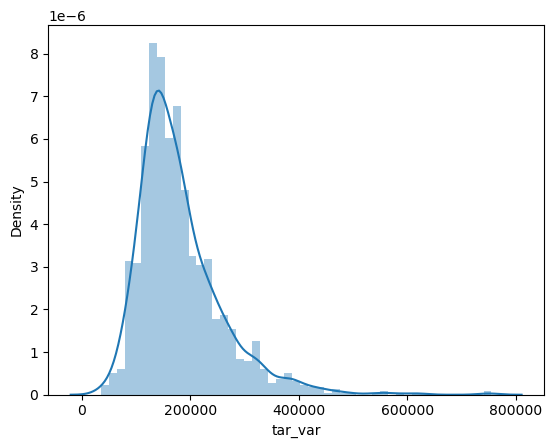

In [31]:
# Plotting histogram of target variable
tar_var = df['tar_var']
sns.distplot(tar_var);

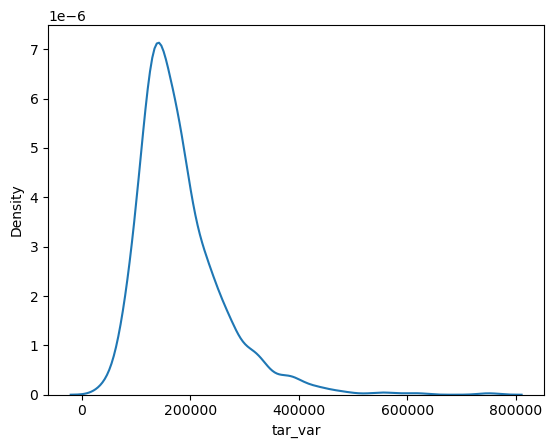

In [32]:
# Checking density plot :
sns.distplot(tar_var, hist=False, rug=False);

In [33]:
# Checking skewness
tar_var.skew()

1.8817600468196507

In [34]:
# Discover outliers with mathematical function

z = np.abs(stats.zscore(tar_var))
print(z)
threshold = 2.5
print(np.where(z > 2.5))
x= np.where(z > 2.5)

0       0.346887
1       0.006998
2       0.535714
3       0.515424
4       0.869309
          ...   
1454    0.051058
1455    0.074827
1456    0.365770
1457    1.077019
1458    0.488674
Name: tar_var, Length: 1459, dtype: float64
(array([  53,   58,  112,  161,  178,  185,  224,  231,  278,  349,  378,
        389,  440,  473,  477,  496,  515,  527,  591,  661,  664,  688,
        691,  769,  774,  798,  803,  825,  898,  987, 1046, 1142, 1169,
       1181, 1182, 1243, 1268, 1353, 1373, 1437], dtype=int64),)


In [35]:
# Finding number of outliers
no_of_outlier=  len(x[0])
no_of_outlier

40

In [36]:
df.iloc[np.where(z > 2.5)[:1]]

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Lane_Type,Property_Shape,Land_Outline,Lot_Configuration,Property_Slope,Neighborhood,...,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Screen_Lobby_Area,Fence_Quality,Sale_Type,Sale_Condition,tar_var,House_life
53,20,RLD,68.000000,50271,No_Allay_Access,IR1,Low,I,GS,Veenker,...,Y,134.075183,24.681074,0.000000,0,No_Fence,WD,Normal,385000,42
58,60,RLD,66.000000,13682,No_Allay_Access,IR2,HLS,CulDSac,GS,StoneBr,...,Y,143.546611,38.096634,0.000000,0,No_Fence,New,Partial,438780,17
112,60,RLD,77.000000,9965,No_Allay_Access,Reg,Lvl,I,GS,CollgCr,...,Y,0.000000,48.912222,27.953119,168,No_Fence,New,Partial,383970,16
161,60,RLD,110.000000,13688,No_Allay_Access,IR1,Lvl,I,GS,NridgHt,...,Y,220.765696,92.411046,51.864835,0,No_Fence,WD,Normal,412500,20
178,20,RLD,63.000000,17423,No_Allay_Access,IR1,Lvl,CulDSac,GS,StoneBr,...,Y,148.575176,0.000000,0.000000,0,No_Fence,New,Partial,501837,15
185,75,RMD,90.000000,22950,No_Allay_Access,IR2,Lvl,I,GS,OldTown,...,Y,192.300758,28.778159,28.453881,410,GdPrv,WD,Normal,475000,131
224,20,RLD,103.000000,13472,No_Allay_Access,Reg,Lvl,I,GS,NridgHt,...,Y,0.000000,13.280539,11.196911,0,No_Fence,WD,Normal,386250,20
231,60,RLD,174.000000,15138,No_Allay_Access,IR1,Lvl,I,GS,NoRidge,...,Y,213.288557,0.000000,49.979600,0,No_Fence,WD,Normal,403000,28
278,20,RLD,107.000000,14450,No_Allay_Access,Reg,Lvl,I,GS,NridgHt,...,Y,0.000000,43.918450,77.446294,142,No_Fence,New,Partial,415298,17
349,60,RLD,56.000000,20431,No_Allay_Access,IR2,Lvl,I,GS,NridgHt,...,Y,396.150118,0.000000,89.157196,0,No_Fence,New,Partial,437154,18


In [37]:
# Remove outliers
df.drop(df.index[x[:1]], inplace=True)

In [38]:
df.tar_var.skew()

0.8327804574032142

# EDA- Exploratory data analysis

In [39]:
# Segregate the data 
df_num = df.select_dtypes(include=['int64','float64' ])
df_fac = df.select_dtypes(include=['object'])
df.dtypes

Building_Class     object
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
Lane_Type          object
                   ...   
Fence_Quality      object
Sale_Type          object
Sale_Condition     object
tar_var             int64
House_life          int64
Length: 64, dtype: object

In [40]:
# Skewness for all numric data
df_num.skew()

Lot_Extent              2.484795
Lot_Size               12.766429
Brick_Veneer_Area       2.670090
BsmtFinSF1              1.794845
BsmtFinSF2              4.229431
BsmtUnfSF               0.842861
Total_Basement_Area     1.562428
First_Floor_Area        1.383366
Second_Floor_Area       0.750883
Grade_Living_Area       1.219015
Garage_Area             0.082321
W_Deck_Area             0.750971
Open_Lobby_Area         0.693325
Enclosed_Lobby_Area     1.062258
Screen_Lobby_Area       4.162795
tar_var                 0.832780
House_life              0.585006
dtype: float64

In [41]:
# Data transformation
df_num["Lot_Extent"]= np.log(df_num["Lot_Extent"])
df_num["Lot_Size"]= np.log(df_num["Lot_Size"])
df_num["Brick_Veneer_Area"] = df_num["Brick_Veneer_Area"] ** (1 / 3)
df_num["BsmtFinSF2"] = df_num["BsmtFinSF2"] ** (1 / 3)
df_num["Screen_Lobby_Area"] = df_num["Screen_Lobby_Area"] ** (1 / 3)
df_num.skew()

Lot_Extent            -0.981051
Lot_Size              -0.177609
Brick_Veneer_Area      0.713337
BsmtFinSF1             1.794845
BsmtFinSF2             2.715075
BsmtUnfSF              0.842861
Total_Basement_Area    1.562428
First_Floor_Area       1.383366
Second_Floor_Area      0.750883
Grade_Living_Area      1.219015
Garage_Area            0.082321
W_Deck_Area            0.750971
Open_Lobby_Area        0.693325
Enclosed_Lobby_Area    1.062258
Screen_Lobby_Area      3.272239
tar_var                0.832780
House_life             0.585006
dtype: float64

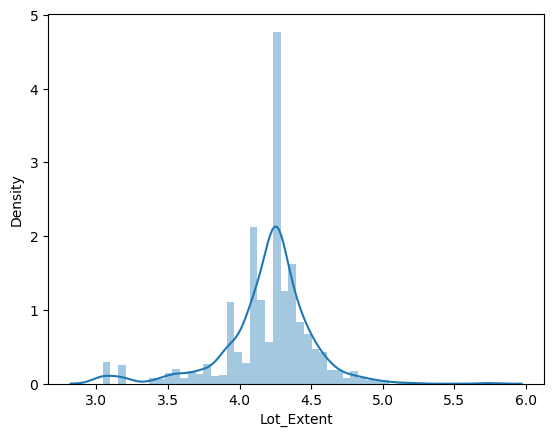

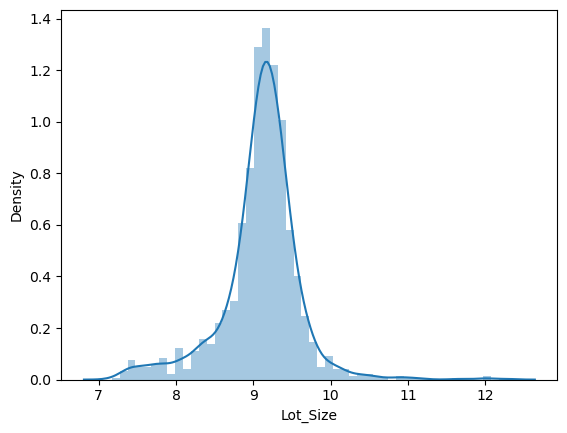

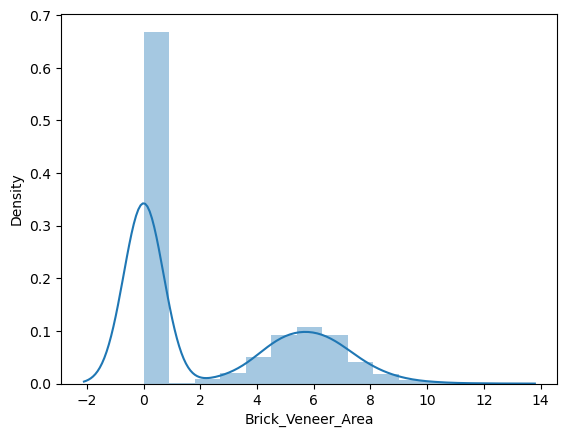

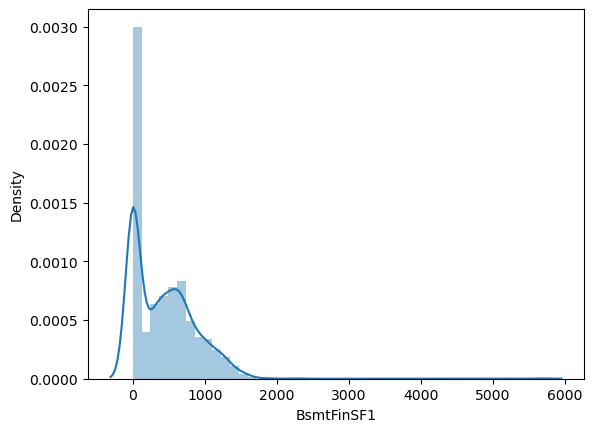

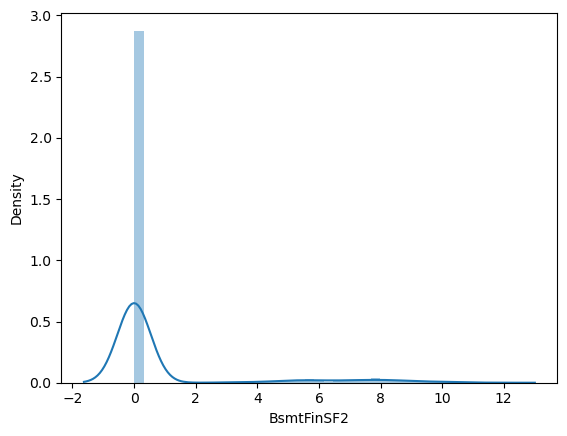

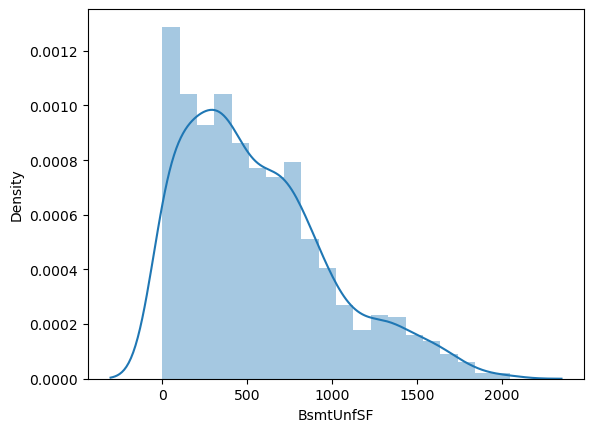

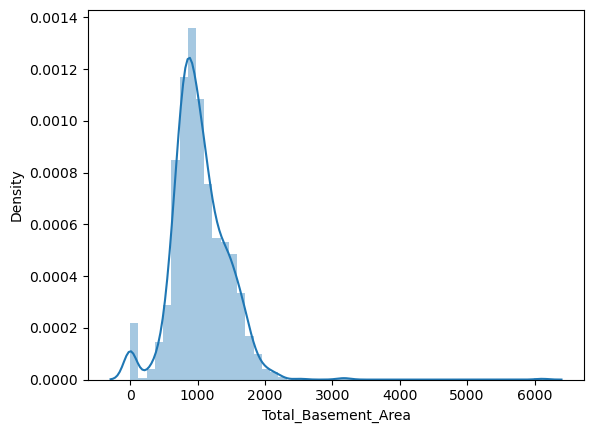

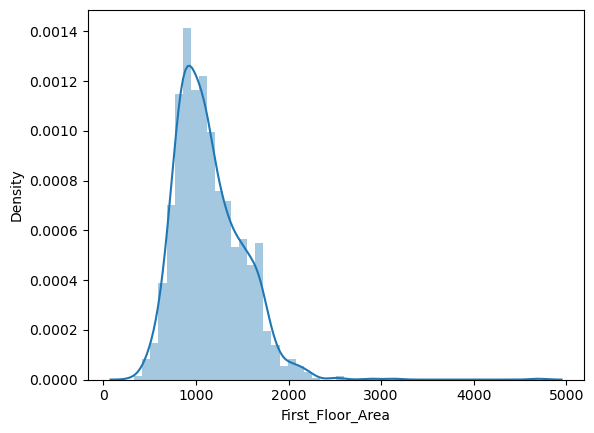

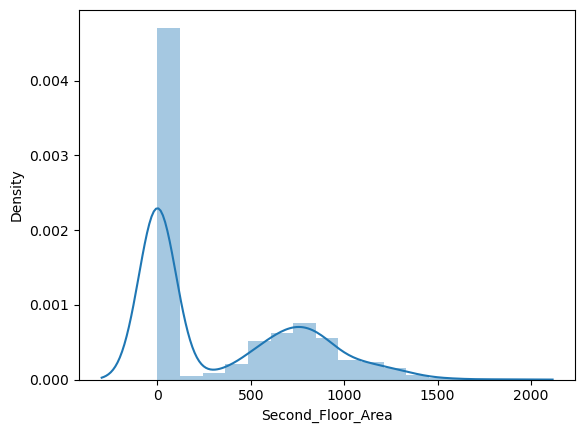

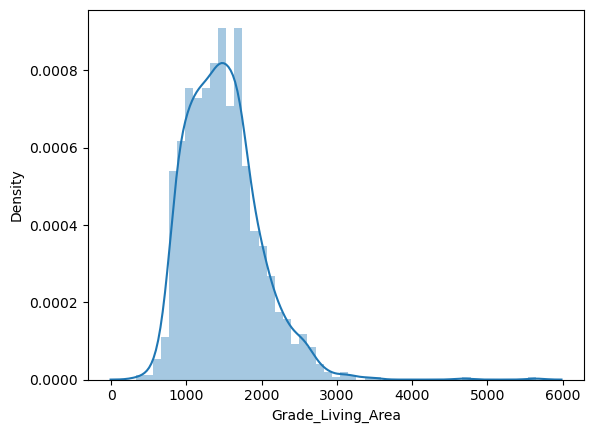

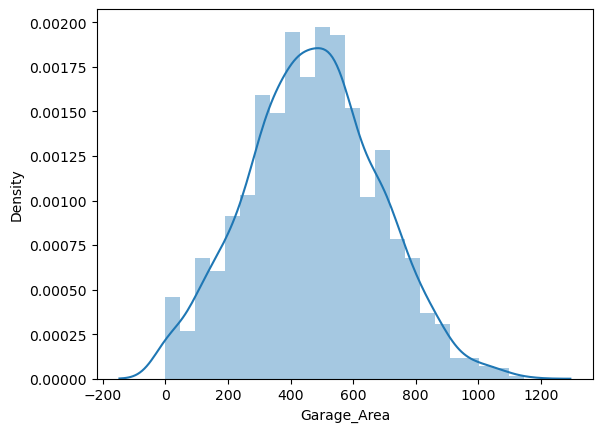

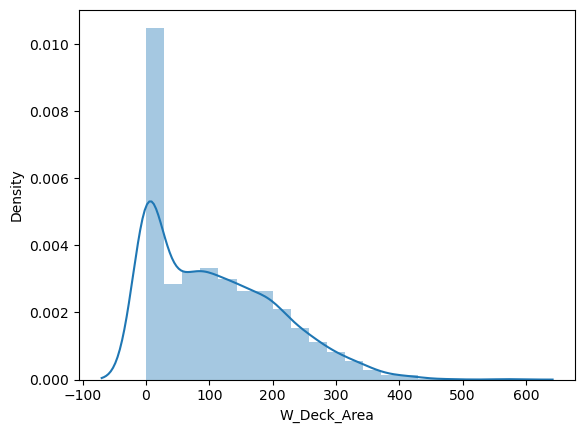

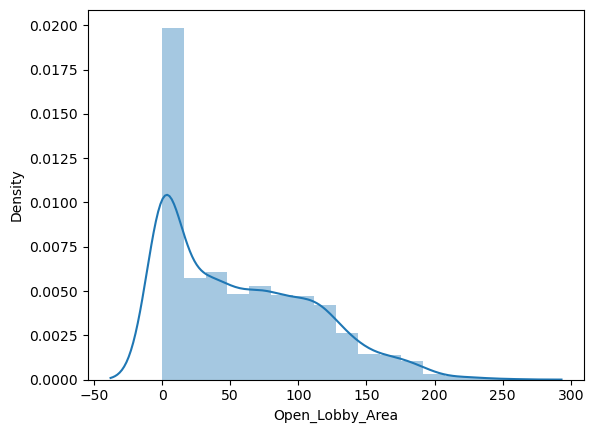

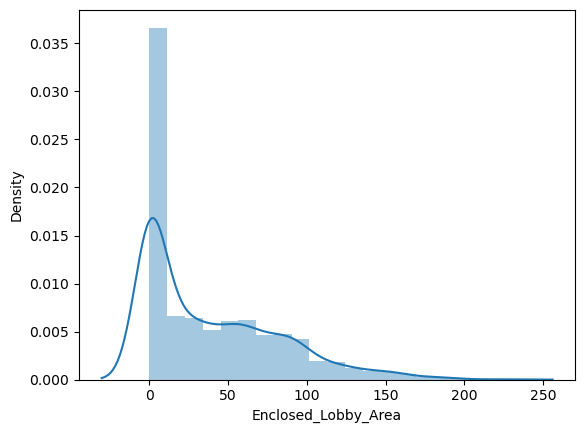

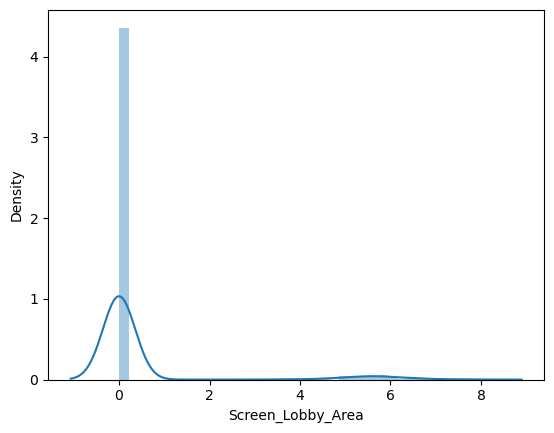

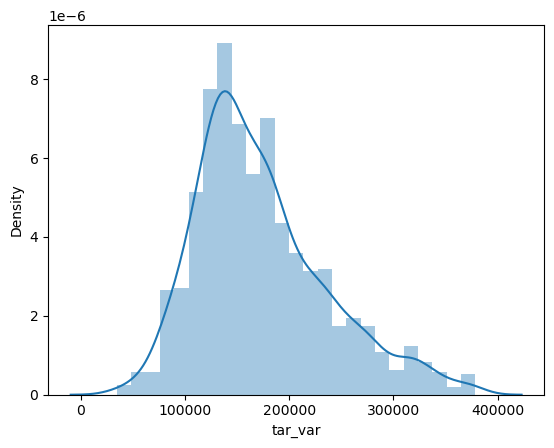

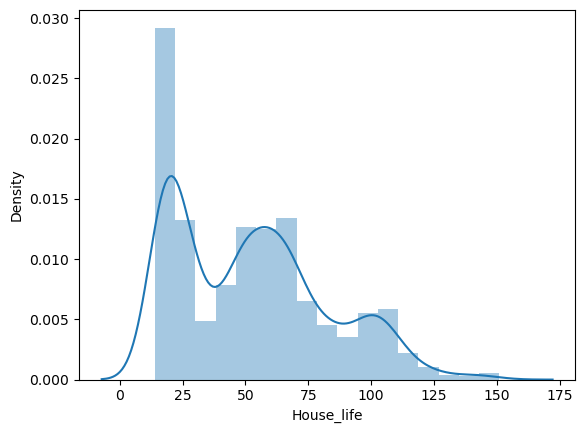

In [42]:
# Plotting histogram for all numeric column
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.distplot(df_num[col])

In [43]:
fac_feature = df_fac.columns
print(fac_feature)

Index(['Building_Class', 'Zoning_Class', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Roof_Design', 'Exterior1st', 'Exterior2nd',
       'Brick_Veneer_Type', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade', 'Kitchen_Quality',
       'Rooms_Above_Grade', 'Functional_Rate', 'Fireplaces',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Size',
       'Garage_Quality', 'Garage_Condition', 'Pavedd_Drive', 'Fence_Quality',
       'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [44]:
list(enumerate(fac_feature))

[(0, 'Building_Class'),
 (1, 'Zoning_Class'),
 (2, 'Lane_Type'),
 (3, 'Property_Shape'),
 (4, 'Land_Outline'),
 (5, 'Lot_Configuration'),
 (6, 'Property_Slope'),
 (7, 'Neighborhood'),
 (8, 'Condition1'),
 (9, 'House_Type'),
 (10, 'House_Design'),
 (11, 'Overall_Material'),
 (12, 'House_Condition'),
 (13, 'Roof_Design'),
 (14, 'Exterior1st'),
 (15, 'Exterior2nd'),
 (16, 'Brick_Veneer_Type'),
 (17, 'Exterior_Material'),
 (18, 'Exterior_Condition'),
 (19, 'Foundation_Type'),
 (20, 'Basement_Height'),
 (21, 'Basement_Condition'),
 (22, 'Exposure_Level'),
 (23, 'BsmtFinType1'),
 (24, 'BsmtFinType2'),
 (25, 'Heating_Quality'),
 (26, 'Air_Conditioning'),
 (27, 'Electrical_System'),
 (28, 'Underground_Full_Bathroom'),
 (29, 'Underground_Half_Bathroom'),
 (30, 'Full_Bathroom_Above_Grade'),
 (31, 'Half_Bathroom_Above_Grade'),
 (32, 'Bedroom_Above_Grade'),
 (33, 'Kitchen_Quality'),
 (34, 'Rooms_Above_Grade'),
 (35, 'Functional_Rate'),
 (36, 'Fireplaces'),
 (37, 'Fireplace_Quality'),
 (38, 'Garage

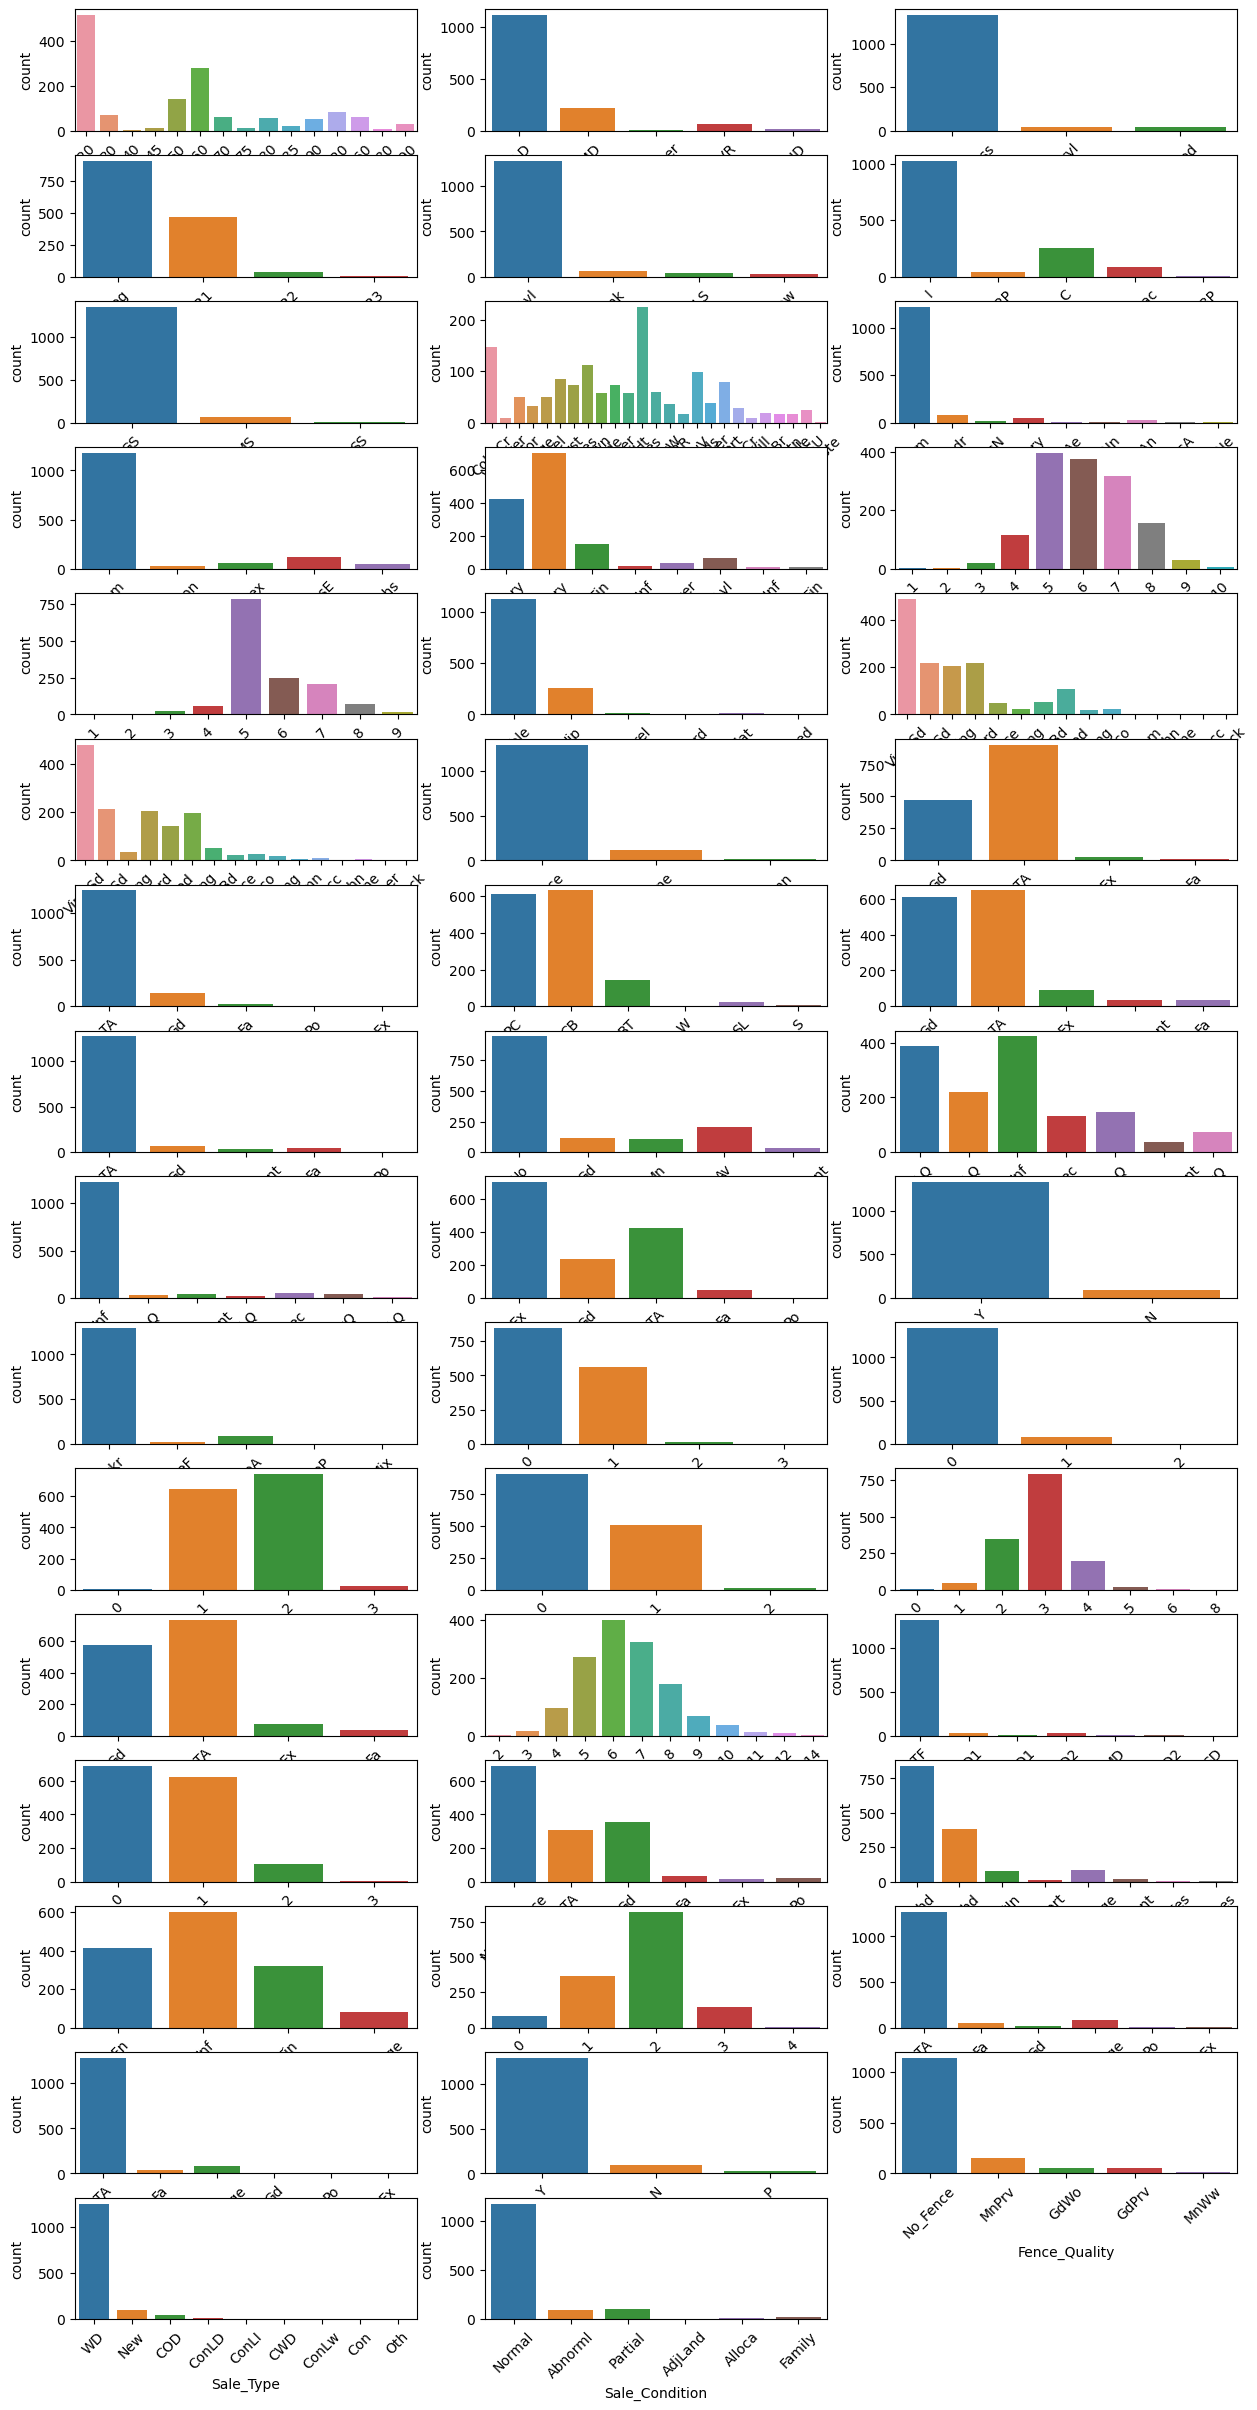

In [45]:
# Assuming 'fac_feature' is a list of categorical column names
plt.figure(figsize=(15, 30))
for i, feature in enumerate(fac_feature):
    plt.subplot(16, 3, i + 1)
    sns.countplot(x=feature, data=df_fac)
    plt.xticks(rotation=45)

plt.show()

# Correlation matrix or heat map

<Axes: >

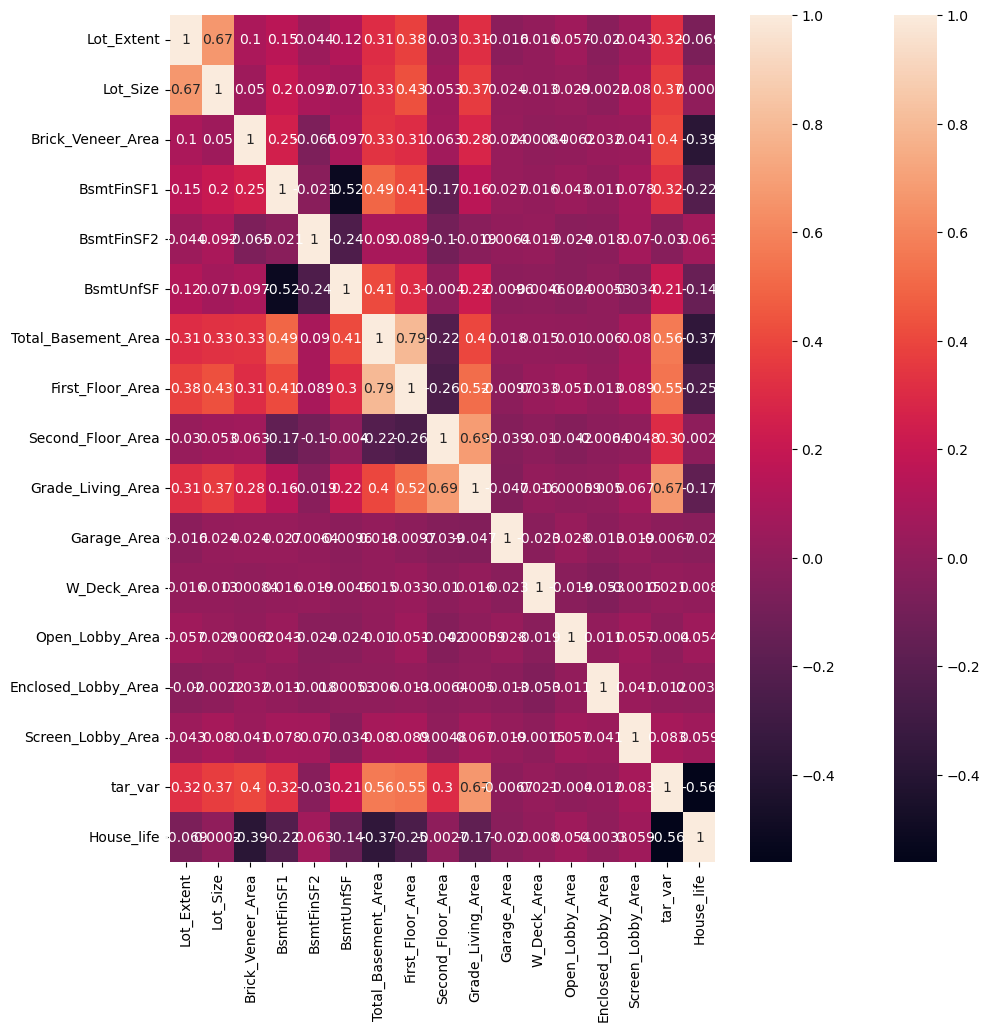

In [46]:
# corrplot
corrmat= df_num.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)
sns.heatmap(corrmat,annot=True)

In [47]:
# Combining Categorical and Numeric data

New_df = pd.concat([df_num,df_fac], axis=1)
New_df.columns

Index(['Lot_Extent', 'Lot_Size', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'First_Floor_Area',
       'Second_Floor_Area', 'Grade_Living_Area', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Screen_Lobby_Area',
       'tar_var', 'House_life', 'Building_Class', 'Zoning_Class', 'Lane_Type',
       'Property_Shape', 'Land_Outline', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Roof_Design', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade

# Data Splitting

In [48]:
# spliting dependent variable tar_var from New_df
tar_var = New_df['tar_var']
New_df.drop("tar_var", axis=1, inplace=True)

In [49]:
# Converting in dummies
df = pd.get_dummies(New_df, drop_first=False)

In [50]:
df.dtypes

Lot_Extent                float64
Lot_Size                  float64
Brick_Veneer_Area         float64
BsmtFinSF1                  int64
BsmtFinSF2                float64
                           ...   
Sale_Condition_AdjLand       bool
Sale_Condition_Alloca        bool
Sale_Condition_Family        bool
Sale_Condition_Normal        bool
Sale_Condition_Partial       bool
Length: 324, dtype: object

In [51]:

#Spliting now.
x_train,x_test,y_train,y_test = train_test_split(df, tar_var, random_state = 10,test_size = 0.3)

In [52]:
x_train.shape

(993, 324)

In [53]:
x_test.shape

(426, 324)

In [54]:
y_train.shape

(993,)

In [55]:
y_test.shape

(426,)

# Model Creation and Model Evaluation

# 1. Linear Regression

In [56]:
# Implementing model
from sklearn import linear_model as lm
model = lm.LinearRegression()
result = model.fit(x_train, y_train)

In [57]:
model.coef_

array([-3.86955172e+03,  1.52554042e+04,  2.79558424e+02, -2.71386203e+01,
       -3.57109510e+03, -3.33100457e+01,  3.28895743e+01, -5.49185537e+00,
        1.49186476e+01,  4.65752657e+01, -2.82584714e+00,  2.51479670e+00,
        1.43804404e+01,  3.66516713e+01,  5.34442134e+02, -2.00152579e+02,
        9.39628276e+03,  8.32868411e+03, -1.88051234e+03,  2.50410320e+04,
       -4.53329859e+03, -2.98388953e+03,  8.91334231e+03,  3.96592115e+03,
        2.43795161e+03, -2.23151130e+03, -2.85677767e+03,  7.13088470e+03,
       -1.22009940e+04,  5.00853687e+03, -4.35356521e+04, -4.88897767e+04,
        3.37435981e+04, -1.72532005e+02,  1.33130296e+04,  2.00568104e+03,
       -1.77920296e+03,  2.10593178e+03, -3.26728818e+02,  1.53759687e+02,
        7.70627811e+02, -4.62691604e+03,  3.70252854e+03, -5.99284399e+03,
        4.45166090e+03, -2.43706611e+03,  3.97824920e+03,  5.10584008e+03,
        1.31490655e+04,  7.91908717e+02, -2.27648296e+04,  3.71801537e+03,
        7.28979072e+03,  

In [58]:
#Printing the coefficient
print(model.intercept_)

-73710.4671300283


In [59]:
# predicting the values.
predictions = model.predict(x_test)

In [60]:
# Calculation R-Squared value
score= model.score(x_train, y_train)  
linear_R2= score*100
linear_R2

92.91213535360939

In [61]:
# Getting the model eveluation from predicted values
from sklearn import metrics

In [62]:
# model evaluation
linear_mse = metrics.mean_squared_error(y_test, predictions)
linear_mse

591709032.5533051

In [63]:
linear_RMSE= np.sqrt(linear_mse)
linear_RMSE

24325.070042104817

In [64]:
linear_mae= metrics.mean_absolute_error(y_test, predictions)
linear_mae

16736.977168082733

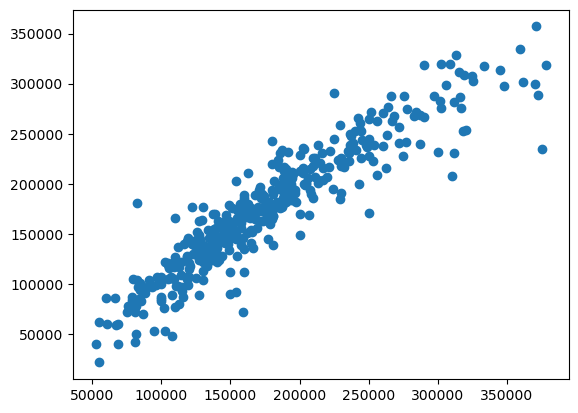

In [65]:
## Plotting the Residuals
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, predictions)

<Axes: xlabel='tar_var', ylabel='Density'>

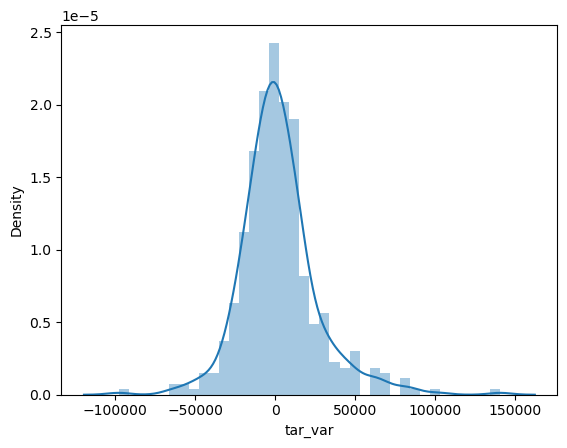

In [66]:
sns.distplot(y_test - predictions)

# 2. Lasso Regression

In [67]:
##Lasso
from sklearn.linear_model import Lasso
lm_lasso= Lasso()

In [68]:
lm_lasso.fit(x_train,y_train)

Lasso()

In [69]:
lm_lasso.coef_

array([-3.73111015e+03,  1.50806056e+04,  2.81354954e+02, -1.80318727e+01,
       -2.02754477e+03, -2.40189426e+01,  2.34937438e+01, -4.12786810e+00,
        1.57886716e+01,  4.53691085e+01, -2.76705686e+00,  2.74308729e+00,
        1.44568075e+01,  3.59109169e+01,  5.37647004e+02, -2.00563120e+02,
        7.05126671e+03,  5.93284411e+03, -3.41868046e+03,  1.98507706e+04,
       -6.91875771e+03, -5.34228694e+03,  6.51041852e+03,  2.47717926e+03,
        0.00000000e+00, -4.01582593e+03, -2.43971490e+03,  3.51801083e+03,
       -1.57444459e+04,  1.32787847e+03, -4.10904691e+04, -4.94316186e+04,
        3.15541960e+04, -2.29522122e+03,  1.12100298e+04, -0.00000000e+00,
       -1.41938908e+03,  2.33602533e+03,  0.00000000e+00, -4.54593821e+02,
        9.90716409e-01, -4.97232091e+03,  2.99694699e+03, -9.86316557e+03,
        3.54499214e+02, -6.28341734e+03,  9.23088692e+01,  1.40855101e+03,
        9.49208010e+03, -2.84493634e+03, -2.60223174e+04, -0.00000000e+00,
        0.00000000e+00,  

In [70]:
# Calculation R-Squared value
lasso_R2=np.round(lm_lasso.score(x_test, y_test)*100,2)
lasso_R2

86.48

In [71]:
#prediction
predict_lm_lasso = lm_lasso.predict(x_test)

In [72]:
# Calculating MSE
from sklearn import metrics
lasso_mse=np.round(metrics.mean_squared_error(y_test,predict_lm_lasso),2)
lasso_mse

580674211.87

In [73]:
lasso_RMSE= np.sqrt(lasso_mse)
lasso_RMSE

24097.182654202545

In [74]:
lasso_mae= metrics.mean_absolute_error(y_test, predict_lm_lasso)
lasso_mae

16638.53325529087

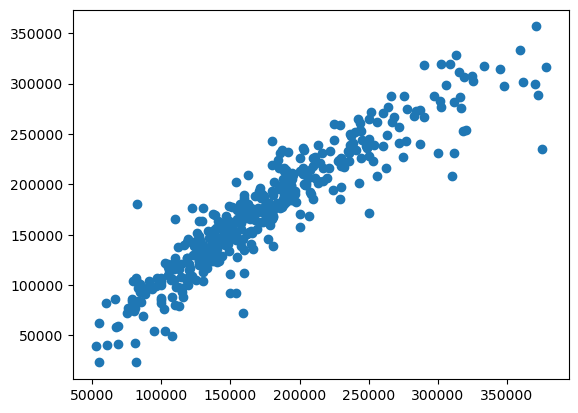

In [75]:
## plotting the residuals
plt.scatter(y_test, predict_lm_lasso)

<Axes: xlabel='tar_var', ylabel='Density'>

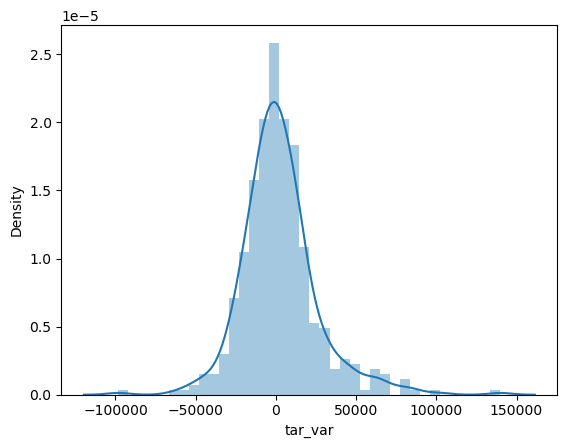

In [76]:
sns.distplot(y_test - predict_lm_lasso)

# 3. Ridge Regression

In [77]:
from sklearn.linear_model import Ridge
lm_ridge= Ridge()

In [78]:
lm_ridge.fit(x_train,y_train)

Ridge()

In [79]:
# Caclulating R-squared value
ridge_R2=np.round(lm_ridge.score(x_test, y_test)*100,2)
ridge_R2

87.8

In [80]:
# Predicting the price on test data
predict_lm_ridge = lm_ridge.predict(x_test)

In [81]:
# Calculating MSE
from sklearn import metrics
ridge_mse=np.round(metrics.mean_squared_error(y_test,predict_lm_ridge),2)
ridge_mse

523785089.03

In [82]:
ridge_RMSE= np.sqrt(ridge_mse)
ridge_RMSE

22886.35158844677

In [83]:
ridge_mae= metrics.mean_absolute_error(y_test, predict_lm_ridge)
ridge_mae

16125.283292602679

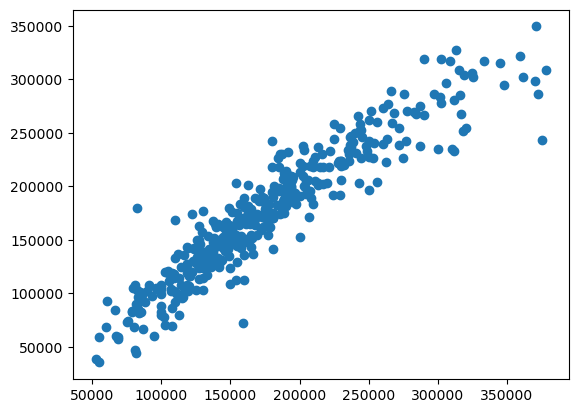

In [84]:
## plotting the residuals
plt.scatter(y_test, predict_lm_ridge)

<Axes: xlabel='tar_var', ylabel='Density'>

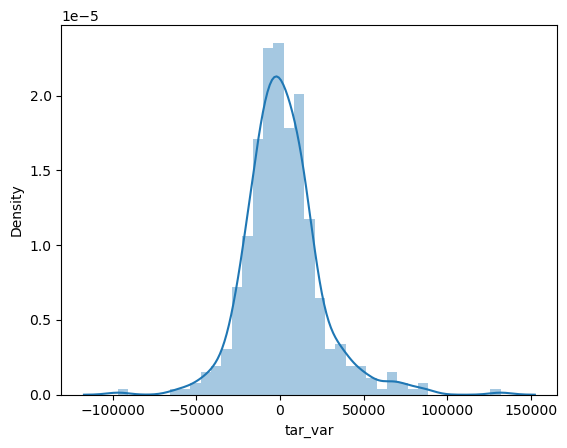

In [85]:
sns.distplot(y_test - predict_lm_ridge)

# 4. Elastic Net

In [86]:
## Elastic_net
from sklearn.linear_model import ElasticNet
lm_elasticnet= ElasticNet()

In [87]:

lm_elasticnet.fit(x_train,y_train)

ElasticNet()

In [88]:
# Caclulating R-Squared value
elasticnet_R2= np.round(lm_elasticnet.score(x_test, y_test)*100,2)
elasticnet_R2

83.61

In [89]:
# Predicting the price on test data
predict_lm_elasticnet = lm_elasticnet.predict(x_test)

In [90]:
# Calculating MSE
from sklearn import metrics
elasticnet_mse=np.round(metrics.mean_squared_error(y_test,predict_lm_elasticnet),2)
elasticnet_mse

703719695.65

In [91]:
elasticnet_RMSE= np.sqrt(elasticnet_mse)
elasticnet_RMSE

26527.715613109245

In [92]:
elasticnet_mae= metrics.mean_absolute_error(y_test, predict_lm_elasticnet)
elasticnet_mae

18249.466854882736

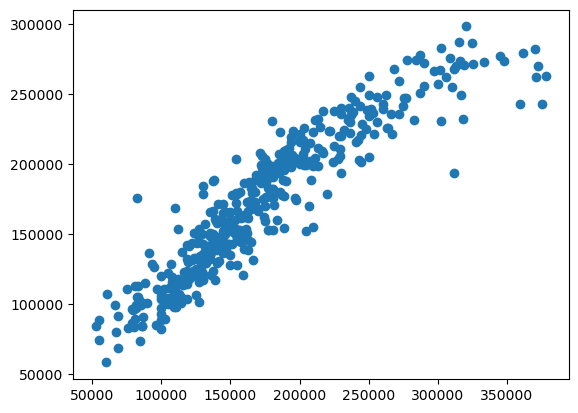

In [93]:
## plotting the residuals
plt.scatter(y_test, predict_lm_elasticnet)

<Axes: xlabel='tar_var', ylabel='Density'>

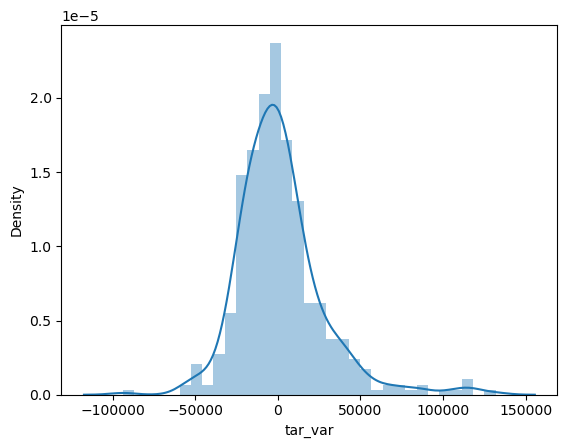

In [94]:
sns.distplot(y_test - predict_lm_elasticnet)

# Comparision of applied Model Results

In [95]:
##All results 

Results = { 'R2' : [linear_R2,lasso_R2,ridge_R2,elasticnet_R2],
            'mse' : [linear_mse,lasso_mse,ridge_mse,elasticnet_mse],
            'RMSE' : [linear_RMSE,lasso_RMSE,ridge_RMSE,elasticnet_RMSE],
            'mae' : [linear_mae,lasso_mae,ridge_mae,elasticnet_mae]
          }

Result_matrix = pd.DataFrame(Results, columns = ['R2','mse','RMSE','mae'], index=['Linear','Lasso','Ridge','Elasticnet'])
print(Result_matrix)

                   R2           mse          RMSE           mae
Linear      92.912135  5.917090e+08  24325.070042  16736.977168
Lasso       86.480000  5.806742e+08  24097.182654  16638.533255
Ridge       87.800000  5.237851e+08  22886.351588  16125.283293
Elasticnet  83.610000  7.037197e+08  26527.715613  18249.466855


# Conclusion